In [730]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [731]:
df=pd.read_csv('Housing.csv')

In [740]:
df.shape

(545, 13)

In [744]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [748]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [750]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [752]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [754]:
df.drop(columns=['prefarea','hotwaterheating','airconditioning','guestroom','basement'], inplace=True) 

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   parking           545 non-null    int64 
 7   furnishingstatus  545 non-null    object
dtypes: int64(6), object(2)
memory usage: 34.2+ KB


In [758]:
df.head(11)

,price,area,bedrooms,bathrooms,stories,mainroad,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,2,furnished
1,12250000,8960,4,4,4,yes,3,furnished
2,12250000,9960,3,2,2,yes,2,semi-furnished
3,12215000,7500,4,2,2,yes,3,furnished
4,11410000,7420,4,1,2,yes,2,furnished
5,10850000,7500,3,3,1,yes,2,semi-furnished
6,10150000,8580,4,3,4,yes,2,semi-furnished
7,10150000,16200,5,3,2,yes,0,unfurnished
8,9870000,8100,4,1,2,yes,2,furnished
9,9800000,5750,3,2,4,yes,1,unfurnished


In [760]:
df['area'].value_counts()  

area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64

In [762]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
parking              int64
furnishingstatus    object
dtype: object

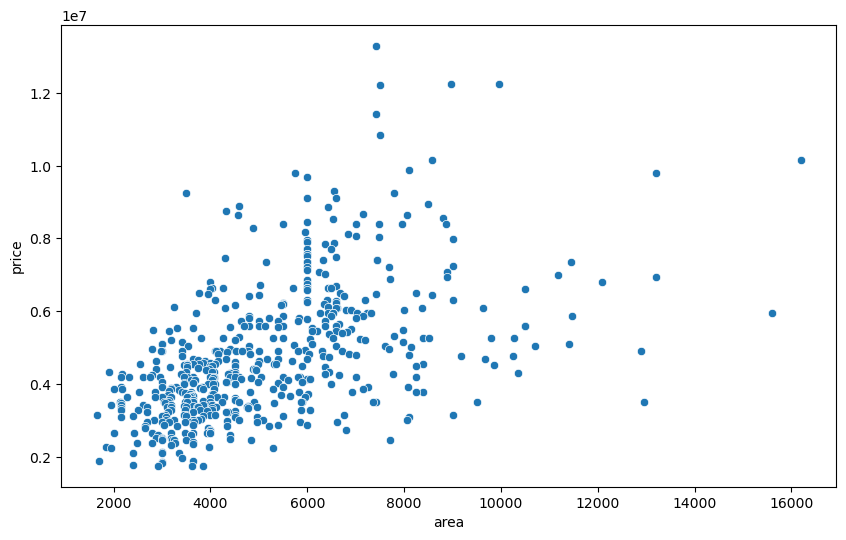

In [693]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='price', data=df)
plt.show()

In [764]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,2,furnished
1,12250000,8960,4,4,4,yes,3,furnished
2,12250000,9960,3,2,2,yes,2,semi-furnished
3,12215000,7500,4,2,2,yes,3,furnished
4,11410000,7420,4,1,2,yes,2,furnished
5,10850000,7500,3,3,1,yes,2,semi-furnished
6,10150000,8580,4,3,4,yes,2,semi-furnished
7,10150000,16200,5,3,2,yes,0,unfurnished
8,9870000,8100,4,1,2,yes,2,furnished
9,9800000,5750,3,2,4,yes,1,unfurnished


In [766]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})

In [768]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,parking,furnishingstatus
0,13300000,7420,4,2,3,1,2,furnished
1,12250000,8960,4,4,4,1,3,furnished
2,12250000,9960,3,2,2,1,2,semi-furnished
3,12215000,7500,4,2,2,1,3,furnished
4,11410000,7420,4,1,2,1,2,furnished
5,10850000,7500,3,3,1,1,2,semi-furnished
6,10150000,8580,4,3,4,1,2,semi-furnished
7,10150000,16200,5,3,2,1,0,unfurnished
8,9870000,8100,4,1,2,1,2,furnished
9,9800000,5750,3,2,4,1,1,unfurnished


In [770]:
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnish')

In [772]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,parking,furnish_furnished,furnish_semi-furnished,furnish_unfurnished
0,13300000,7420,4,2,3,1,2,True,False,False
1,12250000,8960,4,4,4,1,3,True,False,False
2,12250000,9960,3,2,2,1,2,False,True,False
3,12215000,7500,4,2,2,1,3,True,False,False
4,11410000,7420,4,1,2,1,2,True,False,False


In [774]:
df = df_encoded.astype(int)

In [778]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,parking,furnish_furnished,furnish_semi-furnished,furnish_unfurnished
0,13300000,7420,4,2,3,1,2,1,0,0
1,12250000,8960,4,4,4,1,3,1,0,0
2,12250000,9960,3,2,2,1,2,0,1,0
3,12215000,7500,4,2,2,1,3,1,0,0
4,11410000,7420,4,1,2,1,2,1,0,0


In [ ]:
selected_columns = [
    'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'furnish_furnished',
    'furnish_semi-furnished',
    'furnishingst_Unfurnished'
]

sns.pairplot(df[selected_columns])

# Show the plot
plt.show()

In [792]:
corr_matrix = df.corr()

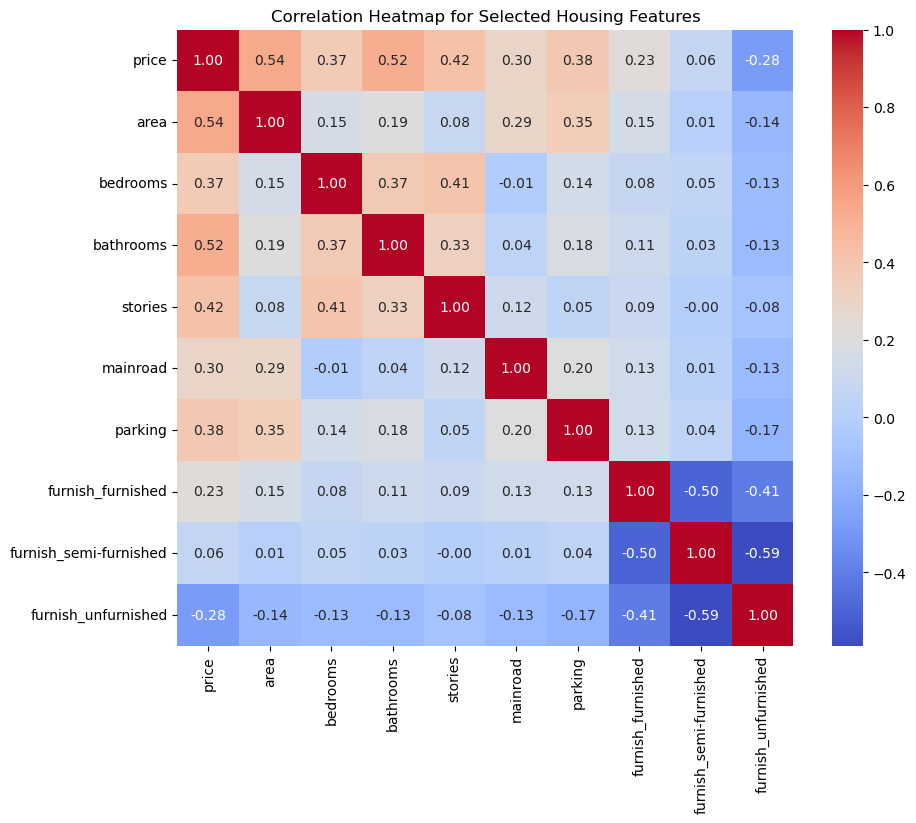

In [796]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      
            fmt=".2f",        
            cmap='coolwarm',  
            square=True)
plt.title('Correlation Heatmap for Selected Housing Features')
plt.show()

In [780]:
liner_model = LinearRegression()

In [782]:
X = df[['area','bedrooms','bathrooms','stories','mainroad','parking','furnish_furnished','furnish_semi-furnished','furnish_unfurnished']]
y = df['price']

In [784]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [786]:
liner_model.fit(X_train, y_train)

LinearRegression()

In [788]:
y_pred = liner_model.predict(X_test)

In [790]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2188186227600.4438
R^2 Score: 0.5670875819410442
